In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Current working directory: /content
Directory contents: ['.config', 'drive', 'sample_data']
Classes in directory: ['LOADED', 'UNLOADED']
Number of images in LOADED: 51
Number of images in UNLOADED: 0
Found 41 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Number of training samples: 41
Number of validation samples: 10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 13s/step - accuracy: 0.5203 - loss: 0.3611 - val_accuracy: 1.0000 - val_loss: 1.4326e-13
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 5.3878e-12 - val_accuracy: 1.0000 - val_loss: 1.0342e-24
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 942ms/step - accuracy: 1.0000 - loss: 5.7554e-22 - val_accuracy: 1.0000 - val_loss: 1.7672e-33
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 1.0000 - loss: 7.1341e-31 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 1.0000 - loss: 2.4237e-40 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.2752e-43 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 742ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


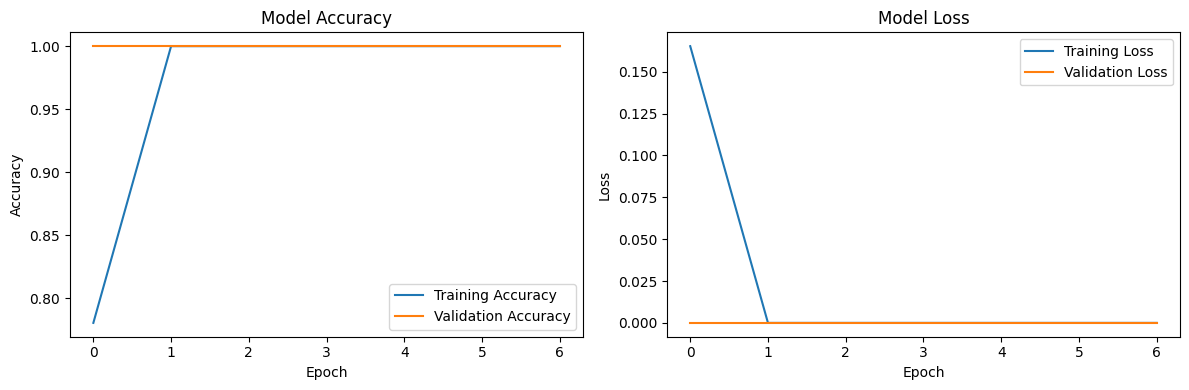

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step
Prediction for /content/drive/MyDrive/PhotosOfLoaded/DATASET/LOADED/1.jpg: UnLoaded

Final Training Metrics:
Training Accuracy: 1.0000
Training Loss: 0.0000
Validation Accuracy: 1.0000
Validation Loss: 0.0000


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# Debug prints to check directory and contents
print("Current working directory:", os.getcwd())
print("Directory contents:", os.listdir())

# Set image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Set up data generators with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Specify the dataset directory
dataset_dir = '/content/drive/MyDrive/PhotosOfLoaded/DATASET'  # Assuming the damaged and no_damage folders are in the current directory


if not os.path.exists(dataset_dir):
    raise ValueError(f"Dataset directory not found: {dataset_dir}")


# Debug prints for directory structure
print("Classes in directory:", os.listdir(dataset_dir))

# Count images in each folder
for folder in ['LOADED', 'UNLOADED']:
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        print(f"Number of images in {folder}: {len(files)}")
    else:
        print(f"Folder {folder} does not exist!")

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    classes=['LOADED', 'UNLOADED']
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    classes=['LOADED', 'UNLOADED']
)

# Print the number of samples
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", validation_generator.samples)

# Create the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Model Summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

# Save the model
model.save('damage_detection_model.h5')

# Function to predict a single image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=(img_width, img_height)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.

    prediction = model.predict(img_array)
    return "Loaded" if prediction[0] > 0.5 else "UnLoaded"

# Plot training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Example of how to use the prediction function
# Replace 'path_to_test_image.jpg' with an actual image path
try:
    test_image_path = '/content/drive/MyDrive/PhotosOfLoaded/DATASET/LOADED/1.jpg'  # Replace with your test image path
    result = predict_image(test_image_path)
    print(f"Prediction for {test_image_path}: {result}")
except Exception as e:
    print(f"Error during prediction: {str(e)}")

# Print final metrics
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print("\nFinal Training Metrics:")
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Training Loss: {final_train_loss:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")

In [4]:
# Function to predict a single image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=(img_width, img_height)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.

    prediction = model.predict(img_array)
    return "Un Loaded" if prediction[0] > 0.5 else "Loaded"

try:
    test_image_path = '/content/drive/MyDrive/PhotosOfLoaded/DATASET/LOADED/1.jpg'  # Replace with your test image path
    result = predict_image(test_image_path)
    print(f"Prediction for {test_image_path}: {result}")
except Exception as e:
    print(f"Error during prediction: {str(e)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for /content/drive/MyDrive/PhotosOfLoaded/DATASET/LOADED/1.jpg: Loaded


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install PyTorch + Detectron2 (Colab 2025 compatible)
import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[1]
print(f"Torch: {TORCH_VERSION} +cu{CUDA_VERSION}")

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu121/torch2.4/index.html
# Restart runtime after this cell runs

In [ ]:
import torch
print(f"PyTorch {torch.__version__}, CUDA: {torch.cuda.is_available()}")

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
print("✅ Detectron2 ready!")

In [6]:
import json
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
import cv2
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
import torch
from google.colab.patches import cv2_imshow

# Data and model paths (adjust if needed)
data_dir = "/content/drive/MyDrive/Wagon edges detection.v1i.coco"
output_dir = "/content/drive/MyDrive/Wagon_count_output"
for d in ["train","test"]:
    json_file = os.path.join(data_dir, d, "_annotations.coco.json")
    image_dir = os.path.join(data_dir, d)
    register_coco_instances(f"my_dataset_{d}", {}, json_file, image_dir)

# Metadata
metadata = MetadataCatalog.get("my_dataset_train")
# metadata.thing_classes = ["objects", "Damage", "Damege", "Debris", "Obstacle"]
# metadata.thing_dataset_id_to_contiguous_id = {0:0, 1:1, 2:2, 3:3, 4:4}
metadata.thing_classes = ["Rail-Wagon", "Front", "Rear"]
metadata.thing_dataset_id_to_contiguous_id = {0: 0, 1: 1, 2: 2}


# Detectron2 Configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
# OR, if you have a local config file:
#cfg.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.VAL = ()
cfg.DATASETS.TEST = ("my_dataset_test",)  # Include the test set

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2  # Adjust based on GPU
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000  # Adjust as needed
cfg.OUTPUT_DIR = output_dir

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


# ... (other code)

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

# *** REPLACE THIS WITH THE ACTUAL PATH TO YOUR TEST IMAGE ***
image_path = "/content/drive/MyDrive/Wagon edges detection.v1i.coco/test/frame_1250_jpg.rf.d06658a856f4f86b79c7fdceb4cd7566.jpg"
# OR
# image_path = os.path.join(data_dir, "test", "frame_1320_jpg.rf.4aee7ba0b6ca9bc34b30f0dcc2559dcf.jpg")  # Example - CHANGE THIS!

print(f"Trying to read image at: {image_path}") # Print the path for debugging
im = cv2.imread(image_path)

if im is None:
    print(f"ERROR: Could not read image at: {image_path}")  # Handle the error
else:
    outputs = predictor(im)
    instances = outputs["instances"].to(torch.device("cpu"))
    high_conf_instances = instances[instances.scores > 0.8]

    v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.5)
    out = v.draw_instance_predictions(high_conf_instances)

    cv2_imshow(out.get_image()[:, :, ::-1])

ModuleNotFoundError: No module named 'detectron2'

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # Load your trained model
predictor = DefaultPredictor(cfg)


paths=["/content/drive/MyDrive/Wagon edges detection.v1i.coco/test/frame_1250_jpg.rf.d06658a856f4f86b79c7fdceb4cd7566.jpg","/content/drive/MyDrive/Wagon edges detection.v1i.coco/test/frame_1480_jpg.rf.f2059211ffa29fac69ce6d52934dbe9d.jpg","/content/drive/MyDrive/Wagon edges detection.v1i.coco/test/frame_1970_jpg.rf.473aed8e1ed837640b689179aed9eb75.jpg","/content/drive/MyDrive/Wagon edges detection.v1i.coco/test/frame_550_jpg.rf.e9a4990d405cfc21dfa87a3cdafaf424.jpg"]


for i in range(len(paths)):
    frame = cv2.imread(paths[i])


    outputs = predictor(frame)

    # Filter by confidence threshold
    instances = outputs["instances"].to(torch.device("cpu"))
    high_conf_instances = instances[instances.scores > 0.8]

    v = Visualizer(frame[:, :, ::-1], metadata=metadata, scale=0.5)
    out = v.draw_instance_predictions(high_conf_instances)

    cv2_imshow(out.get_image()[:, :, ::-1])  # Display the frame in Colab

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to quit
        break


cv2.destroyAllWindows()


In [ ]:
pip install opencv-python

In [ ]:
# Import additional required libraries
import tensorflow as tf
from mrcnn import model as modellib
from mrcnn import utils
from mrcnn.config import Config
import cv2
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt

# Define Mask R-CNN Configuration
class CustomConfig(Config):
    NAME = "custom"

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + your class

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 100

    # Learning rate
    LEARNING_RATE = 0.001

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

    # Setting batch size
    IMAGES_PER_GPU = 1
    GPU_COUNT = 1

# Function to prepare dataset
def prepare_dataset(df, BASE_PATH, target_size=(1024, 1024)):
    images = []
    masks = []

    for idx, row in df.iterrows():
        # Load image
        img_path = os.path.join(BASE_PATH, str(row['filename']))
        if os.path.exists(img_path):
            # Read and preprocess image
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, target_size)

            # Create mask (you'll need to modify this based on your annotations)
            mask = np.zeros(target_size + (1,), dtype=np.bool)
            # Add mask creation logic here based on your annotations

            images.append(image)
            masks.append(mask)

    return np.array(images), np.array(masks)

# Training function
def train_model(train_images, train_masks, val_images, val_masks, config):
    # Initialize model
    model = modellib.MaskRCNN(mode="training", config=config,
                             model_dir="./logs/")

    # Load pre-trained COCO weights
    model.load_weights('mask_rcnn_coco.h5', by_name=True,
                      exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

    # Train the model
    model.train(train_images, train_masks,
                val_images, val_masks,
                learning_rate=config.LEARNING_RATE,
                epochs=30,
                layers='heads')

    return model

# Prediction function
def predict_image(image_path, model, config):
    # Read and preprocess image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Detect objects
    results = model.detect([image], verbose=1)
    r = results[0]

    return r

# Main execution
if __name__ == "__main__":
    # Initialize configuration
    config = CustomConfig()
    config.display()

    # Read your dataset
    df = pd.read_csv('/Users/bhavya/Desktop/allnewphotos/image_labels.csv')
    BASE_PATH = "/Users/bhavya/Desktop/allnewphotos/"

    # Prepare dataset
    images, masks = prepare_dataset(df, BASE_PATH)

    # Split dataset
    train_idx, val_idx = train_test_split(range(len(images)), test_size=0.2)
    train_images, train_masks = images[train_idx], masks[train_idx]
    val_images, val_masks = images[val_idx], masks[val_idx]

    # Train model
    model = train_model(train_images, train_masks, val_images, val_masks, config)

    # Test predictions
    plt.figure(figsize=(20, 20))
    for i, img_path in enumerate(df['filename'].head(5)):
        full_path = os.path.join(BASE_PATH, img_path)
        results = predict_image(full_path, model, config)

        # Display results
        image = cv2.imread(full_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 5, i+1)
        plt.imshow(image)
        plt.title(f'Detection {i+1}')

        # Draw masks
        for j in range(len(results['masks'])):
            mask = results['masks'][:, :, j]
            plt.imshow(mask, alpha=0.5)

        plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
!conda install -c conda-forge keras


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

# Debug prints to check directory and contents
print("Current working directory:", os.getcwd())
print("Directory contents:", os.listdir())

# Set image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

# Set up data generators with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Specify the dataset directory
dataset_dir = '/Users/bhavya/Desktop/Wagonframes'  # Assuming the damaged and no_damage folders are in the current directory

# Debug prints for directory structure
print("Classes in directory:", os.listdir(dataset_dir))

# Count images in each folder
for folder in ['damaged', 'no_damage']:
    folder_path = os.path.join(dataset_dir, folder)
    if os.path.exists(folder_path):
        files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        print(f"Number of images in {folder}: {len(files)}")
    else:
        print(f"Folder {folder} does not exist!")

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    classes=['damaged', 'no_damage']
)

validation_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    classes=['damaged', 'no_damage']
)

# Print the number of samples
print("Number of training samples:", train_generator.samples)
print("Number of validation samples:", validation_generator.samples)

# Create the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Model Summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

# Save the model
model.save('damage_detection_model.h5')

# Function to predict a single image
def predict_image(image_path):
    img = tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=(img_width, img_height)
    )
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.

    prediction = model.predict(img_array)
    return "Damaged" if prediction[0] > 0.5 else "No Damage"

# Plot training history
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)

# Example of how to use the prediction function
# Replace 'path_to_test_image.jpg' with an actual image path
try:
    test_image_path = '/Users/bhavya/Desktop/testing.png'  # Replace with your test image path
    result = predict_image(test_image_path)
    print(f"Prediction for {test_image_path}: {result}")
except Exception as e:
    print(f"Error during prediction: {str(e)}")

# Print final metrics
final_train_accuracy = history.history['accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]

print("\nFinal Training Metrics:")
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Training Loss: {final_train_loss:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Validation Loss: {final_val_loss:.4f}")

In [ ]:
result = predict_image('/Users/bhavya/Desktop/testing.png')
print(result)

In [ ]:
import cv2
import numpy as np
from collections import deque
import time
import logging

class WagonDetector:
    def __init__(self, config):
        self.config = config

        # Initialize background subtractor
        self.bg_subtractor = cv2.createBackgroundSubtractorMOG2(
            history=self.config.history,
            varThreshold=self.config.var_threshold,
            detectShadows=self.config.detect_shadows
        )

        # Initialize counters and trackers
        self.wagon_count = 0
        self.crossed_objects = set()
        self.object_tracker = deque(maxlen=self.config.tracker_length)
        self.last_count_frame = 0

        # Initialize ROI
        self.roi_points = None
        self.roi_mask = None

        # Setup logging
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger('WagonDetector')

    def setup_roi(self, frame):
        """Initialize ROI based on frame dimensions with offset"""
        height, width = frame.shape[:2]

        # Define offset
        x_offset = 400  # pixels from left
        y_offset = 400  # pixels from top

        # Define ROI points (trapezoid shape) with offset
        self.roi_points = np.array([
            [int(width * 0.1) + x_offset, int(height * 0.4) + y_offset],  # Top left
            [int(width * 0.9) + x_offset, int(height * 0.4) + y_offset],  # Top right
            [int(width * 0.95) + x_offset, int(height * 0.8) + y_offset], # Bottom right
            [int(width * 0.05) + x_offset, int(height * 0.8) + y_offset]  # Bottom left
        ], np.int32)

        # Ensure ROI points are within frame boundaries
        self.roi_points = np.clip(self.roi_points, [0, 0], [width-1, height-1])

        # Create ROI mask
        self.roi_mask = np.zeros(frame.shape[:2], dtype=np.uint8)
        cv2.fillPoly(self.roi_mask, [self.roi_points], 255)

    def preprocess_frame(self, frame):
        """Preprocess frame for detection"""
        # Resize frame
        frame = cv2.resize(frame, (self.config.resize_width, self.config.resize_height))

        # Initialize ROI if not already done
        if self.roi_mask is None:
            self.setup_roi(frame)

        # Apply ROI mask
        roi_frame = cv2.bitwise_and(frame, frame, mask=self.roi_mask)

        # Apply Gaussian blur
        blurred = cv2.GaussianBlur(roi_frame,
                                  (self.config.blur_kernel_size, self.config.blur_kernel_size),
                                  0)

        return blurred

    def detect_motion(self, frame):
        """Detect motion using background subtraction"""
        # Apply background subtraction
        fg_mask = self.bg_subtractor.apply(frame)

        # Apply morphological operations
        kernel = np.ones((5,5), np.uint8)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
        fg_mask = cv2.morphologyEx(fg_mask, cv2.MORPH_CLOSE, kernel)

        return fg_mask

    def process_frame(self, frame, frame_count):
        """Process a single frame"""
        # Preprocess frame
        processed = self.preprocess_frame(frame)
        height, width = processed.shape[:2]

        # Detect motion
        motion_mask = self.detect_motion(processed)

        # Find contours
        contours, _ = cv2.findContours(
            motion_mask,
            cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE
        )

        # Draw ROI
        cv2.polylines(frame, [self.roi_points], True, (0, 255, 255), 2)

        # Draw counting line with offset
        x_offset = 400
        y_offset = 400
        line_y = int(height * self.config.line_position) + y_offset
        cv2.line(frame,
                 (int(width * 0.1) + x_offset, line_y),
                 (int(width * 0.9) + x_offset, line_y),
                 (0, 255, 0), 2)

        # Process contours
        for contour in contours:
            area = cv2.contourArea(contour)

            if area > self.config.min_area:
                # Get contour centroid
                M = cv2.moments(contour)
                if M["m00"] != 0:
                    cx = int(M["m10"] / M["m00"])
                    cy = int(M["m01"] / M["m00"])

                    # Check if centroid is in ROI
                    if cv2.pointPolygonTest(self.roi_points, (cx, cy), False) >= 0:
                        # Draw centroid
                        cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)

                        # Check if object crosses the counting line
                        if (abs(cy - line_y) < self.config.line_threshold and
                            frame_count - self.last_count_frame > self.config.min_frames_between_counts):

                            object_id = f"{cx}_{cy}"
                            if object_id not in self.crossed_objects:
                                self.wagon_count += 1
                                self.crossed_objects.add(object_id)
                                self.last_count_frame = frame_count
                                self.logger.info(f"Wagon detected! Count: {self.wagon_count}")

                        # Draw bounding rectangle
                        x, y, w, h = cv2.boundingRect(contour)
                        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Add text overlay
        cv2.putText(
            frame,
            f"Wagon Count: {self.wagon_count}",
            (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 255, 0),
            2
        )

        return frame

class WagonDetectorConfig:
    def __init__(self):
        # Video processing parameters
        self.resize_width = 1920  # Increased for better resolution
        self.resize_height = 1080
        self.blur_kernel_size = 21

        # Background subtractor parameters
        self.history = 500
        self.var_threshold = 16
        self.detect_shadows = False

        # Detection parameters
        self.min_area = 3000
        self.line_position = 0.4  # Adjusted for offset
        self.line_threshold = 10
        self.min_frames_between_counts = 15
        self.tracker_length = 50

def process_video(video_path, output_path=None, display=True):
    # Create configuration
    config = WagonDetectorConfig()

    # Initialize detector
    detector = WagonDetector(config)

    # Open video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError("Error opening video file")

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Initialize video writer if output path is provided
    if output_path:
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_count = 0
    processing_times = []

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            start_time = time.time()

            # Process frame
            processed_frame = detector.process_frame(frame, frame_count)

            # Calculate processing time
            processing_time = time.time() - start_time
            processing_times.append(processing_time)

            # Write frame if output path is provided
            if output_path:
                out.write(processed_frame)

            # Display frame
            if display:
                cv2.imshow('Wagon Detection', processed_frame)

                # Break loop if 'q' is pressed
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break

            frame_count += 1

    except Exception as e:
        logging.error(f"Error processing video: {str(e)}")

    finally:
        # Calculate and print performance metrics
        if processing_times:
            avg_processing_time = np.mean(processing_times)
            avg_fps = 1.0 / avg_processing_time if avg_processing_time > 0 else 0

            print(f"\nPerformance Metrics:")
            print(f"Average processing time per frame: {avg_processing_time:.3f} seconds")
            print(f"Average FPS: {avg_fps:.2f}")

        # Release resources
        cap.release()
        if output_path:
            out.release()
        cv2.destroyAllWindows()

    return detector.wagon_count

def main():
    # Example usage with specific video dimensions
    video_path = "3.mp4"  # Replace with your video path
    output_path = "output_video.mp4"     # Optional output path

    try:
        print("Processing video...")
        wagon_count = process_video(video_path, output_path)
        print(f"\nTotal wagons detected: {wagon_count}")

    except Exception as e:
        print(f"Error: {str(e)}")

if __name__ == "__main__":
    main()

In [ ]:
!pip install torch torchvision
!pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install pycocotools


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
dataset_path = "/content/drive/My Drive/Wagon frames/train copy"
coco_json = f"{dataset_path}/_annotations.coco.json"

In [ ]:
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
import cv2
import os

# Register dataset
register_coco_instances("wagon_train", {}, coco_json, dataset_path)

# Verify dataset
from detectron2.data import MetadataCatalog, DatasetCatalog
metadata = MetadataCatalog.get("wagon_train")
dataset_dicts = DatasetCatalog.get("wagon_train")

# Show sample images
import random
import matplotlib.pyplot as plt

for d in random.sample(dataset_dicts, 3):
    img_path = d["file_name"]
    img = cv2.imread(img_path)
    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.5)
    out = v.draw_dataset_dict(d)

    plt.figure(figsize=(8, 6))
    plt.imshow(out.get_image())
    plt.axis("off")
    plt.show()

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

In [ ]:
import json
import os
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
import cv2
from detectron2.utils.visualizer import Visualizer
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo
import torch
from google.colab.patches import cv2_imshow

# Data and model paths (adjust if needed)
data_dir = "/content/drive/MyDrive/My First Project.v1i.coco-segmentation"
output_dir = "/content/drive/MyDrive/detectron2_output"

# Dataset Registration (Now includes "test")
for d in ["train", "valid", "test"]:
    json_file = os.path.join(data_dir, d, "_annotations.coco.json")
    image_dir = os.path.join(data_dir, d)
    register_coco_instances(f"my_dataset_{d}", {}, json_file, image_dir)

# Metadata
metadata = MetadataCatalog.get("my_dataset_train")
metadata.thing_classes = ["objects", "Damage", "Damege", "Debris", "Obstacle"]
metadata.thing_dataset_id_to_contiguous_id = {0:0, 1:1, 2:2, 3:3, 4:4}

# Detectron2 Configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
# OR, if you have a local config file:
#cfg.merge_from_file("detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.VAL = ("my_dataset_valid",)
cfg.DATASETS.TEST = ("my_dataset_test",)  # Include the test set

cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2  # Adjust based on GPU
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1000  # Adjust as needed
cfg.OUTPUT_DIR = output_dir

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

# Evaluation (Now includes evaluation on the test set)
evaluator = COCOEvaluator("my_dataset_valid", output_dir=cfg.OUTPUT_DIR) # Evaluate on validation set first
val_loader = build_detection_test_loader(cfg, "my_dataset_valid")
print("Evaluation on Validation Set:")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

evaluator = COCOEvaluator("my_dataset_test", output_dir=cfg.OUTPUT_DIR) # Then evaluate on test set
test_loader = build_detection_test_loader(cfg, "my_dataset_test")
print("Evaluation on Test Set:")
print(inference_on_dataset(trainer.model, test_loader, evaluator))


# Inference (Example - same as before)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

im = cv2.imread(os.path.join(data_dir, "test/path/to/your/test_image.jpg")) # Example: reading from the test directory
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to(torch.device("cpu")))

cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# Inference (Example - same as before)
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

im = cv2.imread(os.path.join(data_dir, "")) # Example: reading from the test directory
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.5)
out = v.draw_instance_predictions(outputs["instances"].to(torch.device("cpu")))

cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# ... (other code)

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

# *** REPLACE THIS WITH THE ACTUAL PATH TO YOUR TEST IMAGE ***
image_path = "/content/drive/MyDrive/My First Project.v1i.coco-segmentation/test/frame_1320_jpg.rf.4aee7ba0b6ca9bc34b30f0dcc2559dcf.jpg"  # Example - CHANGE THIS!
# OR
# image_path = os.path.join(data_dir, "test", "frame_1320_jpg.rf.4aee7ba0b6ca9bc34b30f0dcc2559dcf.jpg")  # Example - CHANGE THIS!

print(f"Trying to read image at: {image_path}") # Print the path for debugging
im = cv2.imread(image_path)

if im is None:
    print(f"ERROR: Could not read image at: {image_path}")  # Handle the error
else:
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=metadata, scale=0.5)
    out = v.draw_instance_predictions(outputs["instances"].to(torch.device("cpu")))

    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
!pip install opencv-python torch torchvision supervision transformers

In [ ]:
import cv2
import PIL

def extract_frames(video_path, interval=30):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % interval == 0:
            # Convert BGR to RGB immediately
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)
        frame_count += 1

    cap.release()
    return frames

In [ ]:
from transformers import pipeline
import supervision as sv
import numpy as np

depth_estimator = pipeline(task="depth-estimation", model="LiheYoung/depth-anything-large-hf")
segmenter = pipeline("image-segmentation", model="facebook/mask2former-swin-large-coco-panoptic")

from PIL import Image
import cv2

from transformers import Mask2FormerImageProcessor

# Initialize processor for proper mask decoding
processor = Mask2FormerImageProcessor()



In [ ]:
import numpy as np
import cv2
from PIL import Image
from transformers import pipeline

def process_frame_with_roi(frame,roi):
    """
    Processes a frame with a pre-defined ROI, calculating depth and creating a mask.

    Args:
        frame: The image frame (NumPy array).
        roi_coordinates: A list or tuple of (x1, y1, x2, y2) coordinates
                         representing the top-left and bottom-right corners of the ROI.

    Returns:
        A tuple containing the depth map and a list containing the ROI mask (as a "wagon_mask").
        Returns (None, None) if ROI coordinates are invalid.
    """


    height, width, _ = frame.shape

    # Validate ROI coordinates (same as before) (461, 3, 1846, 1937)
    x1, y1, x2, y2 = roi
    if not (0 <= x1 < width and 0 <= y1 < height and 0 <= x2 < width and 0 <= y2 < height and x1 < x2 and y1 < y2):
        print("Invalid ROI coordinates.")
        return None, None

    # 1. Depth Estimation (same as before)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(frame_rgb)
    depth_result = depth_estimator(pil_image)
    depth_map = np.array(depth_result["depth"])

    # 2. Create ROI Mask (same as before)
    mask = np.zeros((height, width), dtype=np.uint8)
    mask[y1:y2, x1:x2] = 255

    # 3. Prepare the wagon_masks list (containing just the ROI mask)
    wagon_masks = [mask] # Put the mask in a list, just like the segmentation version
    return depth_map, wagon_masks , depth_result



In [ ]:
def calibrate_depth(wagon_mask, depth_map, reference_length_pixels, reference_real_length):
    """
    Calculate depth scaling factor using known reference dimension
    (e.g., wagon width or height in real world)
    """
    # Get pixel coordinates of reference dimension
    y, x = np.where(wagon_mask)
    pixel_length = max(x.max() - x.min(), y.max() - y.min())
    print(f"Pixel length: {pixel_length}")
    # Calculate scale factor (meters per pixel)
    scale_factor = reference_real_length / pixel_length
    return scale_factor

In [ ]:
def calculate_volume(depth_map, mask, scale_factor):
    masked_depth = depth_map * mask
    material_height = masked_depth.max() - masked_depth.min()

    # Calculate area in real-world units
    pixel_area = np.sum(mask)
    real_area = pixel_area * (scale_factor ** 2)

    volume = real_area * material_height * scale_factor
    return volume

In [ ]:
from collections import defaultdict

def process_video(video_path,roi,track_id):

    frames = extract_frames(video_path)

    wagon_volumes = defaultdict(list)

    for frame in frames:
        depth_map, wagon_masks = process_frame_with_roi(frame,roi)

        for idx, mask in enumerate(wagon_masks):
            # Implement tracking ID (could use ByteTrack or simple centroid tracking)
             # Implement tracking logic

            # Get reference dimension (from known wagon specs)
            scale = calibrate_depth(mask, depth_map,
                                  reference_length_pixels=150,
                                  reference_real_length=2.5)  # 2.5m reference

            volume = calculate_volume(depth_map, mask, scale)
            wagon_volumes[track_id].append(volume)

    # Average volumes across frames
    final_volumes = {tid: np.mean(vals) for tid, vals in wagon_volumes.items()}
    return final_volumes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
video_path = r"/content/drive/MyDrive/2 copy.mp4"
track_id = 1
roi = (461, 3, 1846, 1937)
# Execute the pipeline
final_volumes = process_video(video_path,roi,track_id)

# Print results
print("Wagon Volumes (cubic meters):")
for wagon_id, volume in final_volumes.items():
    print(f"Wagon {wagon_id}: {volume:.2f} m³")

In [ ]:
depth_map, wagon_masks , depth_result = process_frame_with_roi(cv2.imread("/content/Screenshot 2025-02-01 at 11.09.23.png"),roi)

In [ ]:
print(depth_result)

In [ ]:
depth_result["depth"].show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

depth_image = np.array(depth_result["depth"])  # Convert PIL image to NumPy array

plt.imshow(depth_image, cmap="magma")  # Change cmap to 'gray' or 'viridis' if needed
plt.colorbar()
plt.axis("off")
plt.show()
